# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here
#!pip install palmerpenguins

In [3]:
from palmerpenguins import *
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Model 1: All predictors

In [4]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [64]:
penguins = load_penguins()

#drop na
penguins = penguins.dropna()

#take response variable out of x
X = penguins.drop('bill_depth_mm', axis =1)

#y is only response variable
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [65]:
X
#penguins["sex"].unique()

,species,island,bill_length_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,210.0,4100.0,male,2009


In [66]:
##model step

## preprocessing: One-hot-encode
## Model specification: Linear Regression

#make object for model specification
lr = LinearRegression()

#make one-hot-encoder object
enc = OneHotEncoder()

#one hot encode species column
ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_i", enc, ['island']),
    ("dummify_sex", enc, ['sex'])]
)

#names ct object as dummify_everything
my_pipeline = Pipeline(
    [('dummify_everything',ct), ('ols', lr)]
)


In [67]:
#fit step
fitted_pipeline = my_pipeline.fit(X_train, y_train)
fitted_pipeline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_i', OneHotEncoder(),
                                                  ['island']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [68]:
y_pred = fitted_pipeline.predict(X_test)

In [69]:
y_train_predict = fitted_pipeline.predict(X_train)

In [70]:
r1_train = r2_score(y_train, y_train_predict)
r1_train

0.8140900762815346

In [71]:
r1 = r2_score(y_test, y_pred)
r1

0.845714667383925

Model 2: predictors bill length, flipper length, body mass

In [100]:
penguins = load_penguins()

#drop na
penguins = penguins.dropna()

#take response variable out of x
X = penguins [["bill_length_mm",	"flipper_length_mm",	"body_mass_g"]]

#y is only response variable
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [101]:
##model step

## preprocessing: One-hot-encode
## Model specification: Linear Regression

#make object for model specification
lr = LinearRegression()

#names ct object as dummify_everything
my_pipeline = Pipeline(
    [('ols', lr)]
)

In [102]:
#fit step
fitted_pipeline = my_pipeline.fit(X_train, y_train)
fitted_pipeline

Pipeline(steps=[('ols', LinearRegression())])

In [103]:
fitted_pipeline.named_steps['ols'].coef_.shape[0]

3

In [104]:
y_pred = fitted_pipeline.predict(X_test)

In [105]:
y_train_predict = fitted_pipeline.predict(X_train)

In [106]:
r2_train = r2_score(y_train, y_train_predict)
r2_train

0.3979928359834848

In [107]:
r2 = r2_score(y_test, y_pred)
r2

0.274718053619432

Model 3: predictors (species, bill_length_mm,	flipper_length_mm,	body_mass_g,	sex)

In [108]:
penguins = load_penguins()

#drop na
penguins = penguins.dropna()

#take response variable out of x
X = penguins [["bill_length_mm",	"flipper_length_mm",	"body_mass_g", "sex", "species"]]

#y is only response variable
y = penguins['bill_depth_mm']


X_train, X_test, y_train, y_test = train_test_split(X,y)

In [109]:
X

,bill_length_mm,flipper_length_mm,body_mass_g,sex,species
0,39.1,181.0,3750.0,male,Adelie
1,39.5,186.0,3800.0,female,Adelie
2,40.3,195.0,3250.0,female,Adelie
4,36.7,193.0,3450.0,female,Adelie
5,39.3,190.0,3650.0,male,Adelie
...,...,...,...,...,...
339,55.8,207.0,4000.0,male,Chinstrap
340,43.5,202.0,3400.0,female,Chinstrap
341,49.6,193.0,3775.0,male,Chinstrap
342,50.8,210.0,4100.0,male,Chinstrap


In [110]:
##model step

## preprocessing: One-hot-encode
## Model specification: Linear Regression

#make object for model specification
lr = LinearRegression()

#make one-hot-encoder object
enc = OneHotEncoder()

#one hot encode species column
ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_sex", enc, ['sex'])]
)

#names ct object as dummify_everything
my_pipeline = Pipeline(
    [('dummify_everything',ct), ('ols', lr)]
)

In [111]:
#fit step
fitted_pipeline = my_pipeline.fit(X_train, y_train)
fitted_pipeline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [112]:
y_pred = fitted_pipeline.predict(X_test)

In [113]:
y_train_predict = fitted_pipeline.predict(X_train)

In [114]:
r3_train = r2_score(y_train, y_train_predict)
r3_train

0.8067335333641728

In [115]:
r3 = r2_score(y_test, y_pred)
r3

0.8619915403662923

Model 4: predictors (species, bill_length_mm, body_mass_g,	sex)

In [116]:
penguins = load_penguins()

#drop na
penguins = penguins.dropna()

#take response variable out of x
X = penguins [["bill_length_mm","body_mass_g", "sex", "species"]]

#y is only response variable
y = penguins['bill_depth_mm']


X_train, X_test, y_train, y_test = train_test_split(X,y)

In [117]:
##model step

## preprocessing: One-hot-encode
## Model specification: Linear Regression

#make object for model specification
lr = LinearRegression()

#make one-hot-encoder object
enc = OneHotEncoder()

#one hot encode species column
ct = ColumnTransformer(
    [("dummify_s", enc, ['species']),
    ("dummify_sex", enc, ['sex'])]
)

#names ct object as dummify_everything
my_pipeline = Pipeline(
    [('dummify_everything',ct), ('ols', lr)]
)

In [118]:
#fit step
fitted_pipeline = my_pipeline.fit(X_train, y_train)
fitted_pipeline

Pipeline(steps=[('dummify_everything',
                 ColumnTransformer(transformers=[('dummify_s', OneHotEncoder(),
                                                  ['species']),
                                                 ('dummify_sex',
                                                  OneHotEncoder(), ['sex'])])),
                ('ols', LinearRegression())])

In [119]:
y_pred = fitted_pipeline.predict(X_test)

In [121]:
y_train_predict = fitted_pipeline.predict(X_train)

In [122]:
r4_train = r2_score(y_train, y_train_predict)
r4_train

0.8377415621640488

In [123]:
r4 = r2_score(y_test, y_pred)
r4

0.7625626710187814

In [124]:
#r2 y, flexibility x
#model 1: 12
#model 2:3
#model 3: 8
#model 4:7

data = [[12, r1_train, r1], [3, r2_train, r2], [8, r3_train, r3], [7, r4_train, r4]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Flexibility', 'R2 Train', 'R2 test'])

# print dataframe.
df

,Flexibility,R2 Train,R2 test
0,12,0.814090,0.845715
1,3,0.397993,0.274718
2,8,0.806734,0.861992
3,7,0.837742,0.762563


In [126]:
long_df = df.melt(id_vars =["Flexibility"], var_name = "Type", value_name = "R2")
long_df

,Flexibility,Type,R2
0,12,R2 Train,0.814090
1,3,R2 Train,0.397993
2,8,R2 Train,0.806734
3,7,R2 Train,0.837742
4,12,R2 test,0.845715
5,3,R2 test,0.274718
6,8,R2 test,0.861992
7,7,R2 test,0.762563


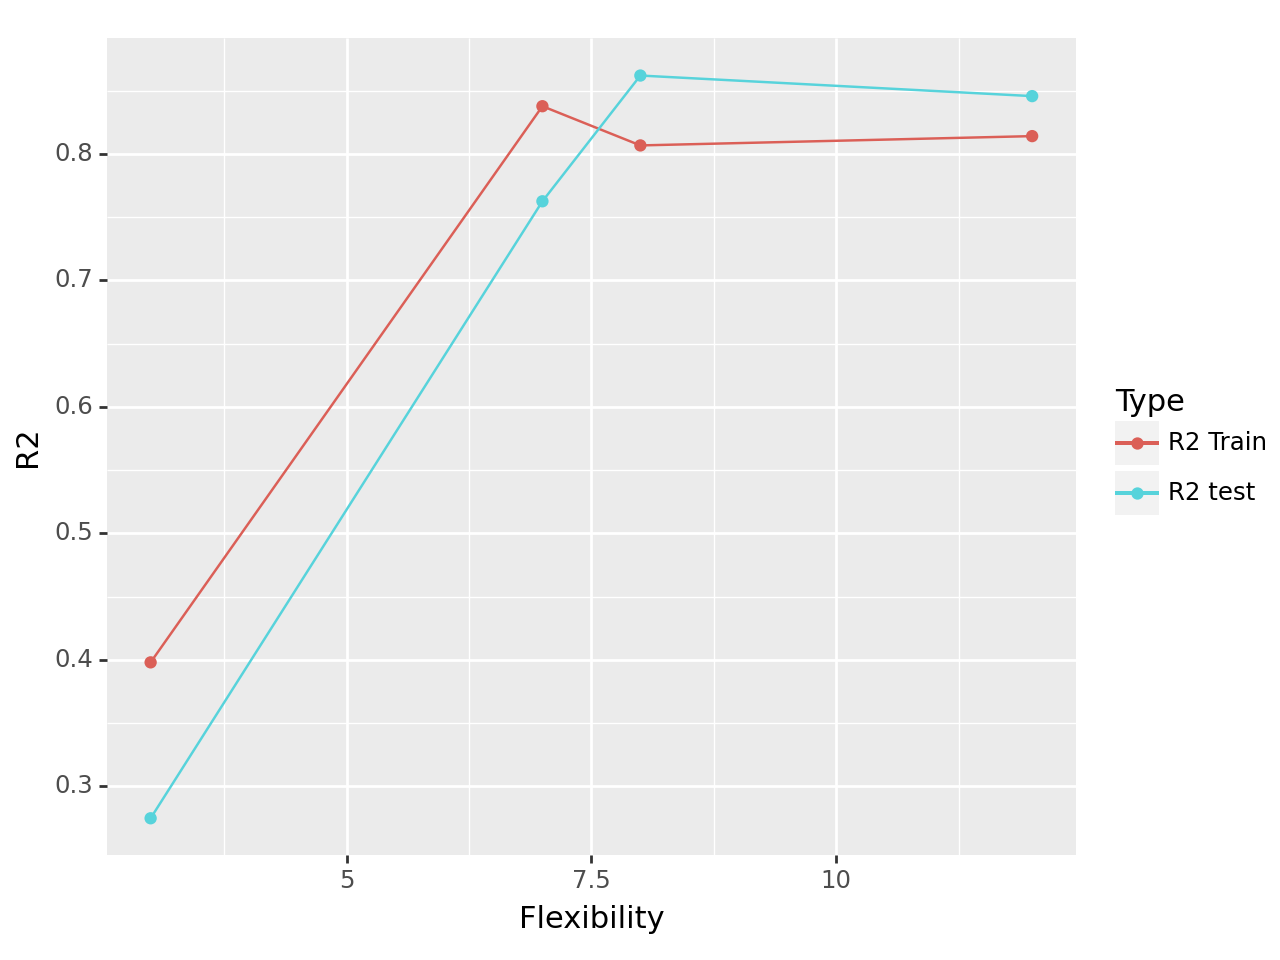

<Figure Size: (640 x 480)>

In [128]:
from plotnine import *
(ggplot(long_df)
+geom_point(aes(x='Flexibility', y = "R2", color = "Type"))
+geom_line(aes(x='Flexibility', y = "R2", color = "Type", group = "Type")))

The best model for future predictions is Model 3 (the model with 8 predictors) with an R^2 on test data of 0.86.